# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

In [4]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


df = pd.read_csv('fuel_econ.csv')
id_cols = ["id", "index"] #
df = df.drop(columns=[col for col in id_cols if col in df.columns])
data = df.select_dtypes(include=[np.number]).values  # Selecting only numerical columns

standardized_data = (data -np.mean(data, axis=0)) / np.std(data, axis=0)  # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
standardized_data[:5]  # Display the first few rows of standardized data

FileNotFoundError: [Errno 2] No such file or directory: 'fuel_econ.csv'

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [2]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)
cov_matrix

array([[ 1.00025458, -0.05532701, -0.07044161,  0.00623397, -0.03365174,
         0.06806739,  0.06675938,  0.07330836,  0.07766039,  0.07201181,
        -0.0811853 , -0.1498676 , -0.14517775],
       [-0.05532701,  1.00025458,  0.93411019,  0.24763384, -0.00426546,
        -0.69327904, -0.66619842, -0.76646982, -0.77169964, -0.73821112,
         0.84848979, -0.78405759, -0.78201448],
       [-0.07044161,  0.93411019,  1.00025458,  0.2594021 ,  0.02207729,
        -0.71366074, -0.6863403 , -0.78418374, -0.78865771, -0.75859024,
         0.85559254, -0.7936343 , -0.79141752],
       [ 0.00623397,  0.24763384,  0.2594021 ,  1.00025458, -0.66581137,
        -0.27817962, -0.27261515, -0.29688365, -0.29858023, -0.29095711,
         0.28727323, -0.2961638 , -0.29323103],
       [-0.03365174, -0.00426546,  0.02207729, -0.66581137,  1.00025458,
         0.03519659,  0.03787859,  0.07497068,  0.07746161,  0.04734493,
        -0.05016567,  0.06489226,  0.06527952],
       [ 0.06806739, -0.693279

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [3]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors

(array([8.95438503e+00, 1.60217406e+00, 1.08130409e+00, 6.69846988e-01,
        3.01556646e-01, 1.59640330e-01, 1.22456393e-01, 6.40188482e-02,
        3.18517161e-02, 9.28848342e-03, 4.25474935e-03, 2.14474101e-03,
        3.87495652e-04]),
 array([[-1.00979556e-02, -7.71359373e-02, -9.52382829e-01,
         -3.36970085e-02, -3.06515611e-02, -9.83646387e-02,
         -2.11590634e-01,  3.29899309e-03, -1.73263432e-01,
          1.29538785e-02, -1.13954835e-02,  7.31999006e-03,
          3.38792348e-03],
        [ 2.81635408e-01,  6.02604172e-02,  3.86142993e-02,
         -5.99579324e-01,  9.73891078e-02,  8.39615393e-02,
         -2.52347721e-01,  6.79369876e-01,  1.16630151e-01,
         -1.93458621e-02, -1.62995878e-02, -7.96619500e-03,
          8.82700851e-04],
        [ 2.86111823e-01,  7.03455458e-02,  5.28436618e-02,
         -5.66831121e-01, -1.05200107e-02,  1.29682332e-02,
         -2.41887602e-01, -7.26445903e-01,  4.71185434e-02,
         -8.32926043e-04, -3.25709036e-03, -

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

In [4]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

sorted_eigenvalues, sorted_eigenvectors

# Calculate explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
print("Explained Variance Ratios:", explained_variance_ratio)

Explained Variance Ratios: [6.88623537e-01 1.23212791e-01 8.31560676e-02 5.15135769e-02
 2.31907611e-02 1.22768999e-02 9.41732506e-03 4.92327341e-03
 2.44950841e-03 7.14316872e-04 3.27205111e-04 1.64938088e-04
 2.97997713e-05]


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [5]:
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {num_components}")



Number of components to retain 95% variance: 5


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [6]:
top_eigenvectors = sorted_eigenvectors[:, :num_components]
reduced_data = np.dot(standardized_data, top_eigenvectors)
reduced_data

array([[ 3.15569908, -1.51331462,  1.51853348,  0.44635715,  0.02269345],
       [-0.42394993, -2.13421661,  1.58333276,  0.79808389, -0.60968448],
       [ 2.05534082, -1.8514677 ,  1.65623972,  0.2065853 , -0.41557238],
       ...,
       [-6.81216633,  0.444618  , -1.46099414, -2.28083392, -0.39144852],
       [ 1.02930309, -2.24834901, -1.28076675, -0.2348994 , -0.70098022],
       [ 2.03273877, -2.19234206, -1.4123657 ,  0.05746281, -0.58124685]],
      shape=(3929, 5))

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

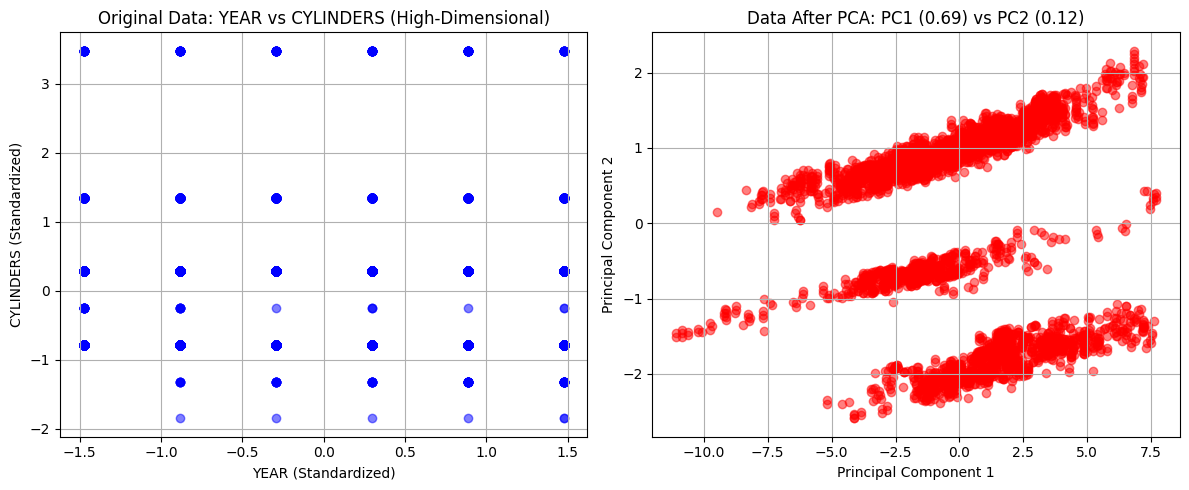

In [7]:
# Step 9: Visualization
plt.figure(figsize=(12, 5))

# Plot Original Data (First Two Features)
plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5, c='blue')
plt.xlabel("YEAR (Standardized)")
plt.ylabel("CYLINDERS (Standardized)")
plt.title("Original Data: YEAR vs CYLINDERS (High-Dimensional)")
plt.grid(True)

# Plot PCA-Reduced Data (First Two Principal Components)
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, c='red')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Data After PCA: PC1 ({explained_variance_ratio[0]:.2f}) vs PC2 ({explained_variance_ratio[1]:.2f})")
plt.grid(True)

plt.tight_layout()
plt.show()